<div style="background-image: url('https://cedcommerce.com/blog/wp-content/uploads/2019/02/Increasing-sale-on-Walmart.png');
background-size: 100% 100%;
font-size: 30px">
<strong><br><br><br><br><br><br><br><br>WALMART SALES FORECASTING<br><br></strong>
</div>

##  Business Context:
We are provided with historical sales data for 45 Walmart stores located in different regions. 

Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. 

The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 


##  OBJECTIVE:
* to create a linear model using historical markdown data for forecasting weekly sales for each department in 45 Walmart stores located in different regions and also to carry out statistical testing and validation of the models
* modelling the effects of markdowns on the holiday weeks  and the extent of impact

Now the challenge of modelling retail data is the need to make decisions based on limited history. If Christmas comes but once a year, so does the chance to see how strategic decisions impacted the bottom line.

##   Data Availability
The given datasets are in **.csv** format.
* train.csv: This is the historical training data, which covers to 2010-02-05 to 2012-11-01
* test.csv: This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

* stores.csv: This file contains anonymized information about the 45 stores, indicating the type and size of store.

* features.csv: This file contains additional data related to the store, department, and regional activity for the given dates. 

<div style="background-color:powderblue;font-size: 200%"><strong><br>
Importing Libraries
<br><br></strong></div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
 
from datetime import datetime

In [2]:
import statsmodels.api as sm
from sklearn import metrics
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

<div style="background-color:powderblue;font-size: 200%"><strong><br>
Importing Dataset
<br><br></strong></div>


In [4]:
import os
os.chdir("C:\\Users\\user\\Desktop\\Alab_Python\\Final Projects in Python\\2. Walmart Store Sales Forecasting")

In [5]:
feature = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
submission =pd.read_csv('sampleSubmission.csv')

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [6]:
print(f">>test-dataset:{train_data.shape}\n{train_data.head(3)}\n\n>>test-dataset:{test_data.shape}\n{test_data.head(3)}")

>>test-dataset:(421570, 5)
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False

>>test-dataset:(115064, 4)
   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False


<div class='alert alert-success'><strong> NOTE:</strong> <br>* Test datset contains all columns of Train data except 'Weekly_Sales'<br> * Now we will merge both the datasets with <tt>feature</tt> and <tt> store</tt> dataset to create new Test, Train Dataset</div>

In [7]:
print(feature.columns)
print(feature.shape)
feature.head(3)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [8]:
print(stores.shape)
stores.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
print(submission.shape)
submission.head()

(115064, 2)


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


<div style="background-color:powderblue;font-size: 200%"><strong><br>
Merging Datasets
<br><br></strong></div>

### Merging train,test dataset with features,stores

In [10]:
train= pd.merge(pd.merge(stores,feature),train_data)
test= pd.merge(pd.merge(stores,feature),test_data)

In [11]:
print(train.shape)
train.columns

(421570, 16)


Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Weekly_Sales'],
      dtype='object')

In [12]:
print(test.shape)
test.columns

(115064, 15)


Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept'],
      dtype='object')

In [13]:
set(train.columns)-set(test.columns)

{'Weekly_Sales'}

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Type            421570 non-null object
Size            421570 non-null int64
Date            421570 non-null object
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [13]:
##whole walmart dataset
#wal_sales=pd.concat([train,test],ignore_index=True)
#print(wal_sales.shape)

In [14]:
#wal_sales.tail(3)

<div style="background-color:powderblue;font-size: 250%"><strong><br>
Data Inspection
<br><br></strong></div>


<div class="alert alert-success"><strong>NOTE:</strong><br>1.**Date** column is converted to datetime type and
<br>2.datatype of the columns **Store** and **Dept** are changed from numeric to string type
<br>3.True & False in-Isholdays columns are converted into datatype int (i.e 1 and 0)
<br>4.Updating holiday list</div>

In [16]:
train['Date']=train['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
test['Date']=test['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [17]:
for col in ['Store','Dept']:
    train[col]=train[col].astype('category')
    test[col]=test[col].astype('category')

In [18]:
#converting True-False into 0-1 entry
train['IsHoliday']=train['IsHoliday'].astype('int64')
test['IsHoliday']=test['IsHoliday'].astype('int64')

### Updating holiday-list

In [19]:
train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)

train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']

test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']

In [20]:
print("IsHoliday= ", train.IsHoliday.value_counts()[1])
print("--"*13)
holiday=0
for col in ['Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas']:
    print(f"{col} --> {train[col].value_counts()[1]} days")
    holiday=holiday+train[col].value_counts()[1]
print("--"*13)
print("   Total --> {} days".format(holiday))
print("--"*13)

IsHoliday=  29661
--------------------------
Super_Bowl --> 8895 days
Labour_Day --> 8861 days
Thanksgiving --> 5959 days
Christmas --> 5946 days
--------------------------
   Total --> 29661 days
--------------------------


#### >Now these extra holiday variable has redundant and should be dropped ,since IsHoliday column has been imputed according to Extra holidays.

In [21]:
#Droping the Extra holiday variables because its redundant..
drop_col_list=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']

#train.drop(drop_col_list,axis=1,inplace=True)
#test.drop(drop_col_list,axis=1,inplace=True)

In [22]:
train.head(3)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,3,13740.12


<div style="background-color:powderblue;font-size: 200%"><strong><br>
Segregating columns of datasets into continuous and categorical type
<br><br></strong></div>

## Creating UDFs

In [23]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                        x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode().iloc[0])
    return x

In [24]:
#test, train dataset both have same categorical features
#cat_cols=['Store','Type','Dept','Date','IsHoliday'] 
cat_cols=['Store', 'Type', 'Dept','Date','IsHoliday']

conti_cols_train=list(set(train.columns)-set(cat_cols))
conti_cols_test=list(set(test.columns)-set(cat_cols)) #test columns dont incluse 'weeklysales'

In [25]:
train_cat=train[cat_cols]
train_conti=train[conti_cols_train]

print(f"train_cat shape: {train_cat.shape}\ntrain_conti shape: {train_conti.shape}")

train_cat shape: (421570, 5)
train_conti shape: (421570, 11)


In [26]:
test_cat=test[cat_cols]
test_conti=test[conti_cols_test]

print(f"test_cat shape: {test_cat.shape}\ntest_conti shape: {test_conti.shape}")

test_cat shape: (115064, 5)
test_conti shape: (115064, 10)


<div style="background-color:powderblue;font-size: 250%"><strong><br>
Data audit report 
<br><br></strong></div>



## Data audit report for Training dataset

In [27]:
train_cat.apply(categorical_var_summary).T.round(2)

,N,NMISS,MODE,FREQ,PERCENT
Store,421570,0,13,10474,2.48
Type,421570,0,A,215478,51.11
Dept,421570,0,1,6435,1.53
Date,421570,0,2011-12-23 00:00:00,3027,0.72
IsHoliday,421570,0,0,391909,92.96


In [28]:
train_conti.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,421570.0,0.0,7.217360e+07,171.20,182.32,39.16,1.533450e+03,126.06,126.11,126.50,128.82,132.02,182.32,212.42,219.44,221.94,225.47,227.23
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.26,7612.03,22711.18,5.157979e+08,-4988.94,5.00,59.97,291.10,2079.65,7612.03,20205.85,42845.67,61201.95,106479.59,693099.36
Size,421570.0,0.0,5.764039e+10,136727.92,140167.00,60980.58,3.718632e+09,34875.00,34875.00,39690.00,39910.00,93638.00,140167.00,202505.00,204184.00,206302.00,219622.00,219622.00
Fuel_Price,421570.0,0.0,1.416908e+06,3.36,3.45,0.46,2.100000e-01,2.47,2.56,2.65,2.72,2.93,3.45,3.74,3.92,4.03,4.20,4.47
MarkDown1,150681.0,270889.0,1.091898e+09,7246.42,5347.45,8291.22,6.874435e+07,0.27,17.76,149.19,375.20,2240.27,5347.45,9210.90,15282.47,21801.35,41524.03,88646.76
MarkDown4,134967.0,286603.0,4.566161e+08,3383.17,1481.31,6292.38,3.959410e+07,0.22,3.97,28.76,108.71,504.22,1481.31,3595.04,7871.42,12645.96,35785.26,67474.85
Unemployment,421570.0,0.0,3.355819e+06,7.96,7.87,1.86,3.470000e+00,3.88,4.16,5.33,5.96,6.89,7.87,8.57,9.82,12.19,14.18,14.31
MarkDown2,111248.0,310322.0,3.709708e+08,3334.63,192.00,9475.36,8.978240e+07,-265.76,-0.99,1.95,6.98,41.60,192.00,1926.94,8549.74,16497.47,50366.60,104519.54
MarkDown3,137091.0,284479.0,1.973317e+08,1439.42,24.60,9623.08,9.260364e+07,-29.10,0.06,0.65,1.65,5.08,24.60,103.99,400.09,1059.90,63143.29,141630.61
Temperature,421570.0,0.0,2.533217e+07,60.09,62.09,18.45,3.403300e+02,-2.06,18.30,27.31,33.98,46.68,62.09,74.28,83.58,87.27,92.81,100.14


## Data audit report for Test dataset

In [29]:
test_cat.apply(categorical_var_summary).T.round(2)

,N,NMISS,MODE,FREQ,PERCENT
Store,115064,0,13,2836,2.46
Type,115064,0,A,58713,51.03
Dept,115064,0,1,1755,1.53
Date,115064,0,2012-12-21 00:00:00,3002,2.61
IsHoliday,115064,0,0,106136,92.24


In [30]:
test_conti.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,76902.0,38162.0,1.360868e+07,176.96,192.30,41.24,1.700730e+03,131.24,131.28,131.48,132.03,138.40,192.30,223.24,225.90,227.78,228.73,228.98
Size,115064.0,0.0,1.570597e+10,136497.69,140167.00,61106.93,3.734056e+09,34875.00,34875.00,39690.00,39910.00,93638.00,140167.00,202505.00,204184.00,206302.00,219622.00,219622.00
Fuel_Price,115064.0,0.0,4.121070e+05,3.58,3.61,0.24,6.000000e-02,2.87,2.96,3.16,3.23,3.43,3.61,3.77,3.87,3.95,4.08,4.12
MarkDown1,114915.0,149.0,8.836063e+08,7689.22,4842.29,10698.76,1.144635e+08,-2781.45,20.84,189.49,457.66,1966.46,4842.29,9439.14,15325.04,23140.88,65757.57,103184.98
MarkDown4,102176.0,12888.0,3.429250e+08,3356.22,840.94,7570.50,5.731249e+07,0.22,2.61,16.96,37.36,155.46,840.94,3096.92,7674.41,14191.01,44739.28,65344.64
Unemployment,76902.0,38162.0,5.282193e+05,6.87,6.81,1.58,2.510000e+00,3.68,3.88,3.93,5.05,5.77,6.81,8.04,8.93,9.91,10.20,10.20
MarkDown2,86437.0,28627.0,3.227602e+08,3734.05,742.59,8323.50,6.928057e+07,-35.74,0.02,6.14,25.77,180.35,742.59,2735.67,9277.29,22671.67,42920.21,71074.17
MarkDown3,105235.0,9829.0,2.528890e+08,2403.09,78.26,13767.94,1.895562e+08,-179.26,0.15,1.18,3.10,15.10,78.26,272.58,698.93,2361.57,86476.66,149483.31
Temperature,115064.0,0.0,6.206760e+06,53.94,54.47,18.72,3.505900e+02,-7.29,11.44,23.98,29.97,39.82,54.47,67.35,79.48,83.82,92.14,101.95
MarkDown5,115064.0,0.0,4.513594e+08,3922.68,2390.43,19445.15,3.781139e+08,-185.17,269.30,540.89,770.88,1309.30,2390.43,4227.27,6966.34,9316.71,18599.30,771448.10


<div style="background-color:powderblue;font-size: 250%"><strong><br>
Missing value Treatment
<br><br></strong></div>

In [31]:
train_cat.isnull().sum()

Store        0
Type         0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [32]:
test_cat.isnull().sum()

Store        0
Type         0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [33]:
train_conti.isnull().sum()
#test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))

CPI                  0
Weekly_Sales         0
Size                 0
Fuel_Price           0
MarkDown1       270889
MarkDown4       286603
Unemployment         0
MarkDown2       310322
MarkDown3       284479
Temperature          0
MarkDown5       270138
dtype: int64

In [34]:
test_conti.isnull().sum()

CPI             38162
Size                0
Fuel_Price          0
MarkDown1         149
MarkDown4       12888
Unemployment    38162
MarkDown2       28627
MarkDown3        9829
Temperature         0
MarkDown5           0
dtype: int64

<div class='alert alert-success'><strong>NOTE that,</strong><br>There is no missing values in categorical columns but some continuous columns have large number of missing values
<br>* where missing values are more than 25% of the total records in whole data, those columns are deleted
<br>* others are imputed with appropriate values</div>

In [35]:
print("-"*50)
print("columns where missing values exists:")
print("-"*50)
print(">>train-data:\n",train.isnull().sum().dropna())
print("\n\n>>test-data:\n",test.isnull().sum().dropna())


--------------------------------------------------
columns where missing values exists:
--------------------------------------------------
>>train-data:
 Store                0
Type                 0
Size                 0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
dtype: int64


>>test-data:
 Store               0
Type                0
Size                0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
IsHoliday           0
Dept                0
dtype: int64


In [46]:
#print("-"*50)
#print("where missing value percentage is more than 25%:")
#print("-"*50)
#print(">>train-data:\n",train_conti.isnull().sum().where(lambda x:  x>len(train_conti)*0.25).dropna())
#print("\n\n>>test-data:\n",test_conti.isnull().sum().where(lambda x:  x>len(test_conti)*0.25).dropna())

<div style="background-color:powderblue;font-size: 250%"><strong><br>
Missing value imputation
<br><br></strong></div>

In [46]:
cols=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]

train[cols]=train[cols].fillna(0)
test[cols]=test[cols].fillna(0)

In [47]:
#misssing values are imputed by corresponding departmental average
for col in ["CPI","Unemployment"]:
    test[col]=test.groupby(['Dept'])[col].transform(lambda x: x.fillna(x.mean())) 
    train[col]=train.groupby(['Dept'])[col].transform(lambda x: x.fillna(x.mean())) 
    #wal_sales[col]=wal_sales.groupby(['Dept'])[col].transform(lambda x: x.fillna(x.mean())) 

<div style="background-color:powderblue;font-size: 250%"><strong><br>
Outlier Treatment
<br><br></strong></div>

In [38]:
col_names1=[ 'Weekly_Sales','Size', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']
train[col_names1].apply(continuous_var_summary).T.round(2)[["P1","MIN","P99","MAX"]]

,P1,MIN,P99,MAX
Weekly_Sales,5.00,-4988.94,106479.59,693099.36
Size,34875.00,34875.00,219622.00,219622.00
Temperature,18.30,-2.06,92.81,100.14
Fuel_Price,2.56,2.47,4.20,4.47
CPI,126.11,126.06,225.47,227.23
Unemployment,4.16,3.88,14.18,14.31


In [39]:
col_names2=['Size', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']
test[col_names2].apply(continuous_var_summary).T.round(2)[["P1","MIN","P99","MAX"]]

,P1,MIN,P99,MAX
Size,34875.00,34875.00,219622.00,219622.00
Temperature,11.44,-7.29,92.14,101.95
Fuel_Price,2.96,2.87,4.08,4.12
CPI,131.28,131.24,228.64,228.98
Unemployment,3.88,3.68,10.20,10.20


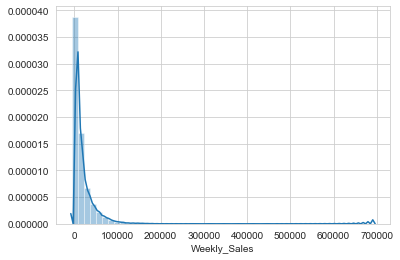

In [40]:
sns.set_style('whitegrid')
sns.distplot(train['Weekly_Sales']);

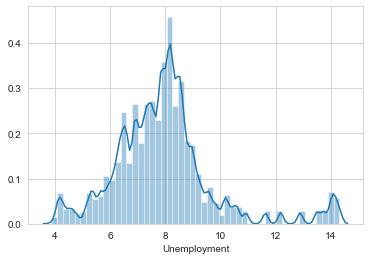

In [41]:
#col_names1=[ 'Weekly_Sales','Size', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']
col='Fuel_Price'
sns.distplot(train['Unemployment']);

In [42]:
###Outlier Treatment

train[['Weekly_Sales']]= train[['Weekly_Sales']]\
                        .apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.dropna().quantile(0.99)))


<div style="background-color:powderblue;font-size: 250%"><strong><br>
Correlation check
<br><br></strong></div>

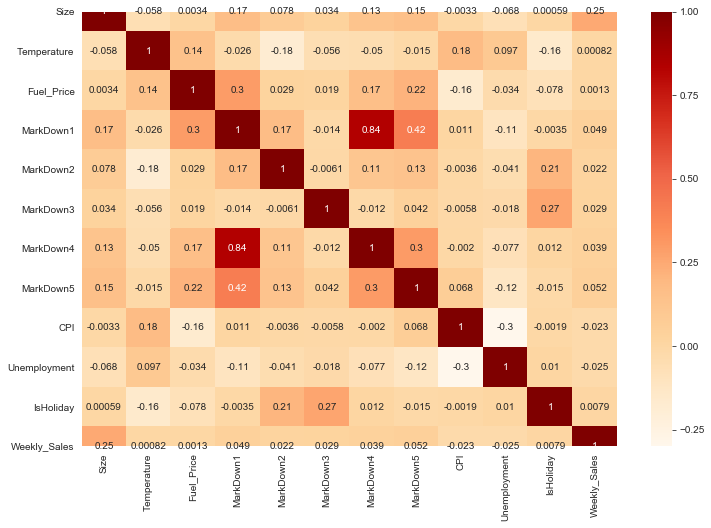

In [48]:
#for train set
plt.subplots(figsize=(12,8))
sns.heatmap(train.corr(),cmap='OrRd',annot=True);

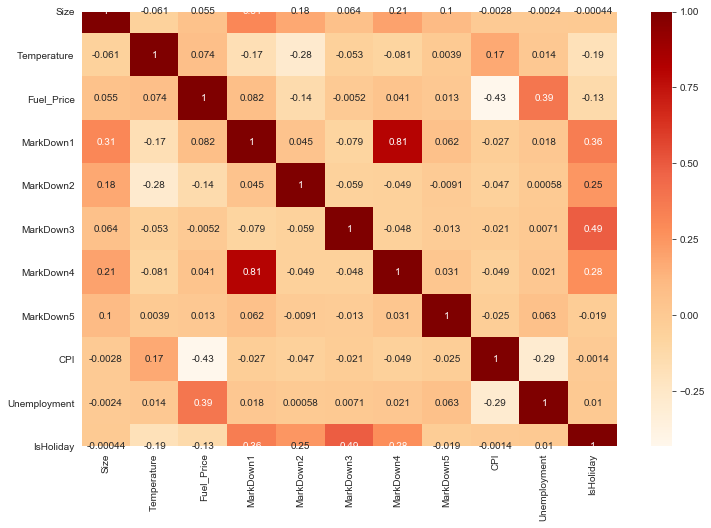

In [49]:
#for test set
plt.subplots(figsize=(12,8))
sns.heatmap(test.corr(),cmap='OrRd',annot=True);

In [50]:
#checking for highly correlated features in train data
corr_mat_train = train.corr().abs()
corr_series1=corr_mat_train .unstack().sort_values(kind="quicksort")

print(">>highly correlated features in test data: (features having correlation coefficient more than 0.70)")
corr_series1.where(lambda x: (x>0.70)&(x<1)).dropna()

>>highly correlated features in test data: (features having correlation coefficient more than 0.70)


MarkDown1  MarkDown4    0.838904
MarkDown4  MarkDown1    0.838904
dtype: float64

In [51]:
#checking for highly correlated features in train data
corr_mat_test = train.corr().abs()
corr_series2=corr_mat_test.unstack().sort_values(kind="quicksort")

print(">>highly correlated features in test data: (features having correlation coefficient more than 0.70)")
corr_series2.where(lambda x: (x>0.70)&(x<1)).dropna()

>>highly correlated features in test data: (features having correlation coefficient more than 0.70)


MarkDown1  MarkDown4    0.838904
MarkDown4  MarkDown1    0.838904
dtype: float64

<div class='alert alert-warning'><strong> NOTE: </strong><br>MarkDown1  and MarkDown4 have high positive correlation (+0.838904) </div>

<div style="background-color:powderblue;font-size: 300%"><strong><br>
Exploratory Data Analysis
<br><br></strong></div>


In [52]:
train.columns

Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Weekly_Sales'],
      dtype='object')

Text(0.5, 0, ' Weekly Sales Amount')

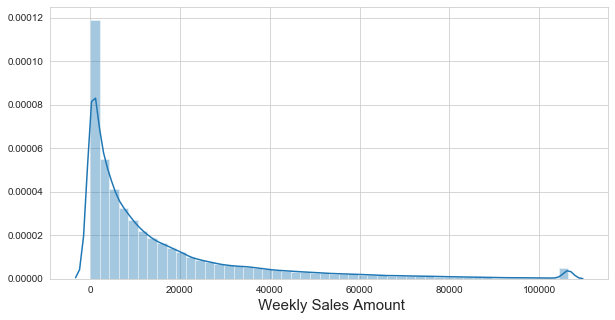

In [53]:
plt.subplots(figsize=(10,5))
sns.distplot(train.Weekly_Sales)
plt.xlabel(" Weekly Sales Amount",fontsize=15)

## Average Weekly Sales in Different stores of Walmart

In [54]:
#df1_top5=train[['Store','Weekly_Sales']].groupby(['Store']).mean().nlargest(columns=['Weekly_Sales'],n=5,keep='all')

df1=train[['Store','Weekly_Sales']].groupby(['Store']).mean()
print(">>Top 5 stores based on average weekly-sales:\n\n",df1.sort_values('Weekly_Sales',ascending=False).head())

>>Top 5 stores based on average weekly-sales:

        Weekly_Sales
Store              
20     27724.172233
4      27600.643512
14     26768.557779
13     25823.138688
10     25552.536807


total stores= 45

no of stores having avg weekly sales-->
     more than overall Walmart weekly sales: 19(shown in green)
     less than overall Walmart weekly sales: 26(shown in yellow)


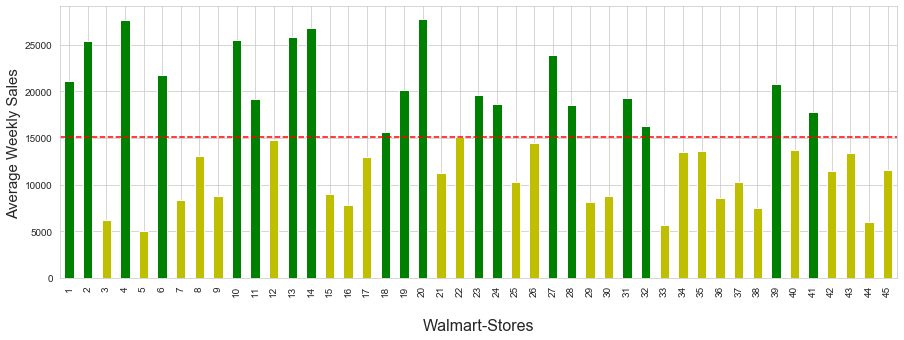

In [55]:
overall_avg=df1.Weekly_Sales.mean()
print(f"total stores= {df1.shape[0]}\n\nno of stores having avg weekly sales-->")
print(f"     more than overall Walmart weekly sales: {df1.loc[df1.Weekly_Sales>overall_avg].shape[0]}(shown in green)")
print(f"     less than overall Walmart weekly sales: {df1.loc[df1.Weekly_Sales<overall_avg].shape[0]}(shown in yellow)")

plt.subplots(figsize=(15,5))
df1['Weekly_Sales'].plot(kind='bar',
                        color=(df1['Weekly_Sales']>overall_avg).map({True: 'g',False: 'y'})
                        )
plt.axhline(y=overall_avg, color='r', linestyle='--')
plt.xlabel("\nWalmart-Stores",fontsize=16);
plt.ylabel("Average Weekly Sales",fontsize=15);

## Average Weekly Sales in different departments of Walmart

>>Top 5 stores based on average weekly-sales:

       Weekly_Sales
Dept              
92    65267.442384
95    64707.663558
38    60609.679484
72    46701.112841
65    45441.706224

>>Total Departments= 81

No of Departments having avg weekly sales-->
     more than overall Walmart weekly sales: 31(shown in green)
     less than overall Walmart weekly sales: 50(shown in yellow)


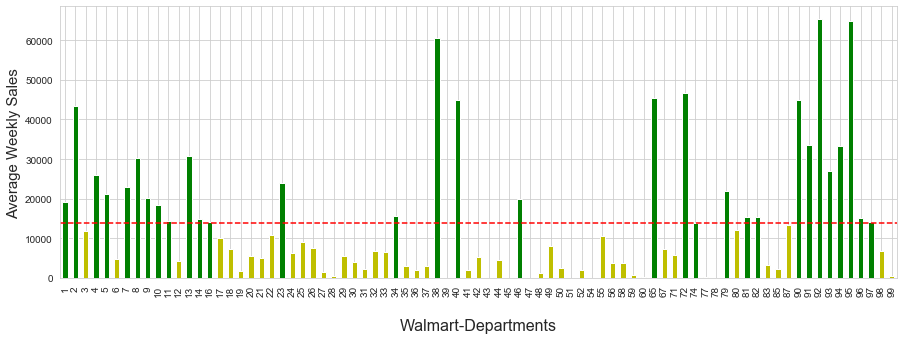

In [56]:
df2=train[['Dept','Weekly_Sales']].groupby(['Dept']).mean()
print(">>Top 5 stores based on average weekly-sales:\n\n",df2.sort_values('Weekly_Sales',ascending=False).head())

overall_avg2=df2.Weekly_Sales.mean()
print(f"\n>>Total Departments= {df2.shape[0]}\n\nNo of Departments having avg weekly sales-->")
print(f"     more than overall Walmart weekly sales: {df2.loc[df2.Weekly_Sales>overall_avg2].shape[0]}(shown in green)")
print(f"     less than overall Walmart weekly sales: {df2.loc[df2.Weekly_Sales<overall_avg2].shape[0]}(shown in yellow)")

plt.subplots(figsize=(15,5))
df2['Weekly_Sales'].plot(kind='bar',color=(df2['Weekly_Sales']>overall_avg2).map({True: 'g',False: 'y'}))
plt.axhline(y=overall_avg2, color='r', linestyle='--')
plt.xlabel("\nWalmart-Departments",fontsize=16);
plt.ylabel("Average Weekly Sales",fontsize=15);

## Average Weekly Sales in Different store-types of Walmart

>>Average weekly-sales in all types:

       Weekly_Sales
Type              
A     19540.695108
B     12131.286191
C      9519.172127

No of Departments having avg weekly sales-->
     more than overall Walmart weekly sales: 1(shown in green)
     less than overall Walmart weekly sales: 2(shown in yellow)


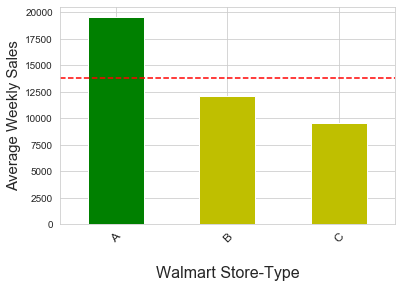

In [57]:
df3=train[['Type','Weekly_Sales']].groupby(['Type']).mean()
print(">>Average weekly-sales in all types:\n\n",df3)

overall_avg3=df3.Weekly_Sales.mean()
print(f"\nNo of Departments having avg weekly sales-->")
print(f"     more than overall Walmart weekly sales: {df3.loc[df3.Weekly_Sales>overall_avg3].shape[0]}(shown in green)")
print(f"     less than overall Walmart weekly sales: {df3.loc[df3.Weekly_Sales<overall_avg3].shape[0]}(shown in yellow)")

#plt.subplots(figsize=(15,5))
df3['Weekly_Sales'].plot(kind='bar',color=(df3['Weekly_Sales']>overall_avg3).map({True: 'g',False: 'y'}))
plt.axhline(y=overall_avg2, color='r', linestyle='--')
plt.xlabel("\nWalmart Store-Type",fontsize=16)
plt.ylabel("Average Weekly Sales",fontsize=15);
plt.xticks(rotation=45,fontsize=12);

# Feature Extraction
In this section,appropriate features are seletected to train our classifier and new features are created based on existing features.

In [58]:
train.columns

Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Weekly_Sales'],
      dtype='object')

### Extracting date features

In [59]:
train['Date'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: Date, dtype: datetime64[ns]

In [60]:
#training dataset
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 
train['Date_dayofweek'] =train['Date'].dt.dayofweek

#test dataset
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day 
test['Date_dayofweek'] =test['Date'].dt.dayofweek

In [61]:
train[['Date_year','Date_month','Date_day','Date_dayofweek']].head()

,Date_year,Date_month,Date_day,Date_dayofweek
0,2010,2,5,4
1,2010,2,5,4
2,2010,2,5,4
3,2010,2,5,4
4,2010,2,5,4


In [62]:
train.Date_year.unique(),train.Date_month.unique()

(array([2010, 2011, 2012], dtype=int64),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64))

In [63]:
train[['Date_year','Weekly_Sales']].groupby('Date_year').mean()

,Weekly_Sales
Date_year,
2010,15908.725787
2011,15613.579002
2012,15423.253172


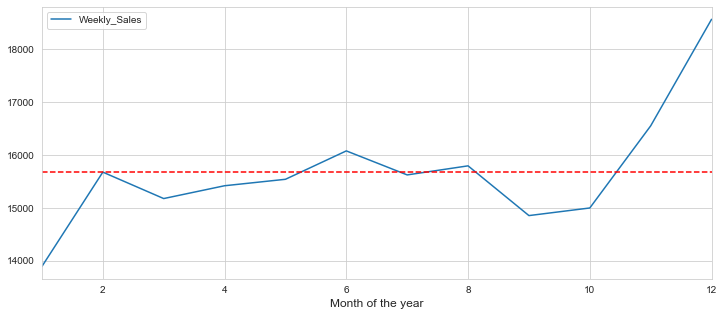

In [64]:
monthly_df=train[['Date_month','Weekly_Sales']].groupby('Date_month').mean()

monthly_df.plot(figsize=(12,5))
plt.axhline(y=monthly_df.mean()[0], color='r', linestyle='--')
plt.xlabel("Month of the year",fontsize=12);
#lt.xticks(labels=['jan','feb','mar','april','may','june','july','august','sept','oct','nov','dec'],rotation='vertical')

<div style="background-color:powderblue;font-size: 300%"><strong><br><br>
MODEL BUILDING
<br><br></strong></div>

## Data Preparation for MODEL BUILDING

In [65]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in [train,test]:  dataset['Type_new'] = dataset['Type'].map(type_mapping)
    
train['Type_new']=train['Type_new'].astype("object")
train['Type_new'].dtypes

dtype('O')

In [66]:
train.head().T

,0,1,2,3,4
Store,1,1,1,1,1
Type,A,A,A,A,A
Size,151315,151315,151315,151315,151315
Date,2010-02-05 00:00:00,2010-02-05 00:00:00,2010-02-05 00:00:00,2010-02-05 00:00:00,2010-02-05 00:00:00
Temperature,42.31,42.31,42.31,42.31,42.31
Fuel_Price,2.572,2.572,2.572,2.572,2.572
MarkDown1,0,0,0,0,0
MarkDown2,0,0,0,0,0
MarkDown3,0,0,0,0,0
MarkDown4,0,0,0,0,0


In [67]:
train.columns

Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Date_month',
       'Date_year', 'Date_day', 'Date_dayofweek', 'Type_new'],
      dtype='object')

In [68]:
#checking for highly correlated features
corr_mat = train.corr().abs()
#type(corr_mat.unstack().sort_values(kind="quicksort"))

corr_series=corr_mat.unstack().sort_values(kind="quicksort")
corr_series.where(lambda x: (x>0.70)&(x<1)).dropna()

Date_year   Fuel_Price    0.779633
Fuel_Price  Date_year     0.779633
MarkDown1   MarkDown4     0.838904
MarkDown4   MarkDown1     0.838904
dtype: float64

## Saving processed train and test data

In [70]:
#saving processed train and test data
drop_cols=['Unemployment','CPI','MarkDown5','Date', 'Type']

train.drop(drop_cols, axis=1).to_csv(r'C:\Users\user\Desktop\Alab_Python\Final Projects in Python\2. Walmart Store Sales Forecasting\sales_data.csv',index=False)
test.drop(drop_cols,axis=1).to_csv(r'C:\Users\user\Desktop\Alab_Python\Final Projects in Python\2. Walmart Store Sales Forecasting\data_to_predict.csv',index=False)

## Defining independent and dependent Variable

In [71]:
drop_cols_train=['Weekly_Sales','Unemployment','CPI','MarkDown5','Date', 'Type']
drop_cols_test=['Unemployment','CPI','MarkDown5','Date', 'Type']

In [72]:
train_X=train.drop(drop_cols_train, axis=1)# train X= Exery thing except Weekly_Sales
train_y=train['Weekly_Sales'] # train Y= Only Weekly_Sales 

test_X=test.drop(drop_cols_test,axis=1)

train_X.shape, train_y.shape, test_X.shape

((421570, 15), (421570,), (115064, 15))

<div style="background-color:powderblue;font-size: 250%"><strong><br><br>
Linear Regression
<br><br></strong></div>

In [73]:
lin_reg = LinearRegression() #creating a instance of linear regression
lin_reg.fit(train_X, train_y) #fitting with train data

LinearRegression()

In [74]:
y_pred_linear=lin_reg.predict(test_X)
print(y_pred_linear.shape)
y_pred_linear

(115064,)


array([13717.97253894, 13816.51567078, 13915.05880262, ...,
       16735.60558704, 16932.69185073, 17031.23498257])

In [75]:
accu_linear=lin_reg.score(train_X, train_y)
accu_linear=round(accu_linear*100,2)
print ('Model Accuracy: '+str(accu_linear) + '%')

Model Accuracy: 8.87%


<div style="background-color:powderblue;font-size: 250%"><strong><br><br>
Random Forest Regressor
<br><br></strong></div>


In [76]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_X, train_y)

y_pred_rf=rf_model.predict(test_X)
y_pred_rf

array([33798.6359, 47874.2054, 10594.751 , ..., 59322.586 ,  6635.6176,
         764.8634])

In [77]:
accu_rf= round(rf_model .score(train_X, train_y) * 100, 2)
print ('Model Accuracy: '+str(accu_rf) + '%')

Model Accuracy: 99.76%


<div style="background-color:powderblue;font-size: 250%"><strong><br><br>
Descision Tree Regressor
<br><br></strong></div>


In [78]:
dtree_model=DecisionTreeRegressor()
dtree_model.fit(train_X, train_y)

y_pred_dt= dtree_model.predict(test_X)
y_pred_dt

array([39886.06, 48577.08,  9959.64, ..., 58795.72,  5724.94,  1061.02])

In [79]:
accu_dt = round( dtree_model.score(train_X, train_y) * 100, 2)
print ('Model Accuracy: '+str(accu_dt) + '%')

Model Accuracy: 100.0%


## Comparison among three models 

In [80]:
pd.DataFrame({'model':['Linear Regression','Random Forest','Descision Tree'],
                'accuracy':[accu_linear,accu_rf,accu_dt]})

,model,accuracy
0,Linear Regression,8.87
1,Random Forest,99.76
2,Descision Tree,100.00


## Final prediction for weekly sales

In [81]:
final_prediction=dtree_model.predict(test_X)
final_prediction.shape

(115064,)